## Buisness Problem Statement:
Analyzing the Netflix data and generating insights helps Netflix decide which type of shows/movies to produce and how to grow their business in multiple countries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Basic Analysis**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


EDA (Exploratory data analysis)
-From above the column director having more null values along with cast,country and date_added


# **1. Un-nesting the columns**

---





handling null values

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['director']=df['director'].fillna('Unknown Director')
df['cast']=df['cast'].fillna('Unknown Actors')
df['country']=df['country'].fillna('Unknown country')
df.dropna(inplace=True)
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df_unnested_cast =df["cast"].str.split(', ').explode()
df_cast=df_unnested_cast.to_frame(name='cast')
df_comb_actors=df[['title']].join(df_cast)
print(df_comb_actors)

df_unnested_director =df["director"].str.split(', ').explode()
df_cast=df_unnested_director.to_frame(name='director')
df_comb_director=df[['title']].join(df_cast)
print(df_comb_director)

df_unnested_listed_in =df["listed_in"].str.split(', ').explode()
df_cast=df_unnested_listed_in.to_frame(name='listed_in')
df_comb_genre=df[['title']].join(df_cast)
print(df_comb_genre)

df_unnested_country =df["country"].str.split(', ').explode()
df_cast=df_unnested_country.to_frame(name='country')
df_comb_country=df[['title']].join(df_cast)
print(df_comb_country)

                     title                   cast
0     Dick Johnson Is Dead         Unknown Actors
1            Blood & Water             Ama Qamata
1            Blood & Water            Khosi Ngema
1            Blood & Water          Gail Mabalane
1            Blood & Water         Thabang Molaba
...                    ...                    ...
8806                Zubaan       Manish Chaudhary
8806                Zubaan           Meghna Malik
8806                Zubaan          Malkeet Rauni
8806                Zubaan         Anita Shabdish
8806                Zubaan  Chittaranjan Tripathy

[64841 rows x 2 columns]
                      title          director
0      Dick Johnson Is Dead   Kirsten Johnson
1             Blood & Water  Unknown Director
2                 Ganglands   Julien Leclercq
3     Jailbirds New Orleans  Unknown Director
4              Kota Factory  Unknown Director
...                     ...               ...
8802                 Zodiac     David Fincher
8803  

In [ ]:
df_comb_actors['cast'].value_counts()

Unknown Actors           825
Anupam Kher               43
Shah Rukh Khan            35
Julie Tejwani             33
Takahiro Sakurai          32
                        ... 
Lee Han-wi                 1
Lee Jae-yoon               1
Ernest R. Dickerson        1
Jeon Hye-bin               1
Chittaranjan Tripathy      1
Name: cast, Length: 36393, dtype: int64

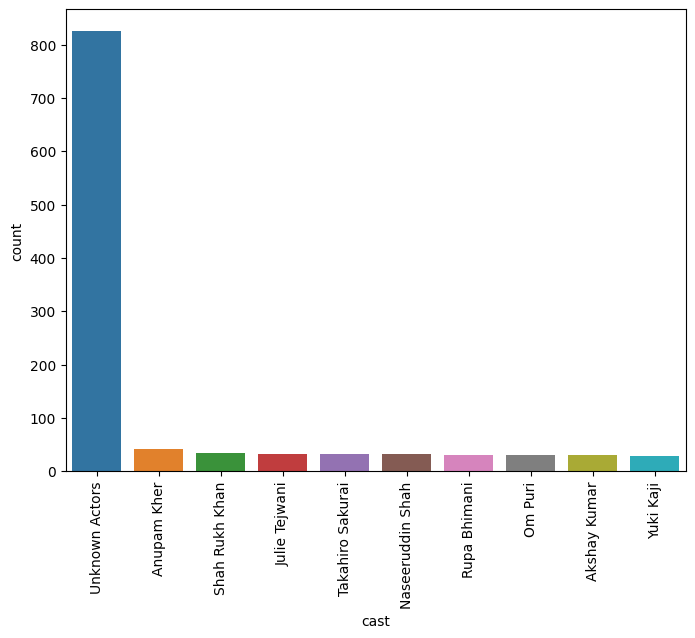

In [ ]:
plt.figure(figsize=(8,6))
top_cast=df_comb_actors['cast'].value_counts().head(10).index
sns.countplot(data=df_comb_actors,x='cast',order=top_cast)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_comb_genre['listed_in'].value_counts().head(10)

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

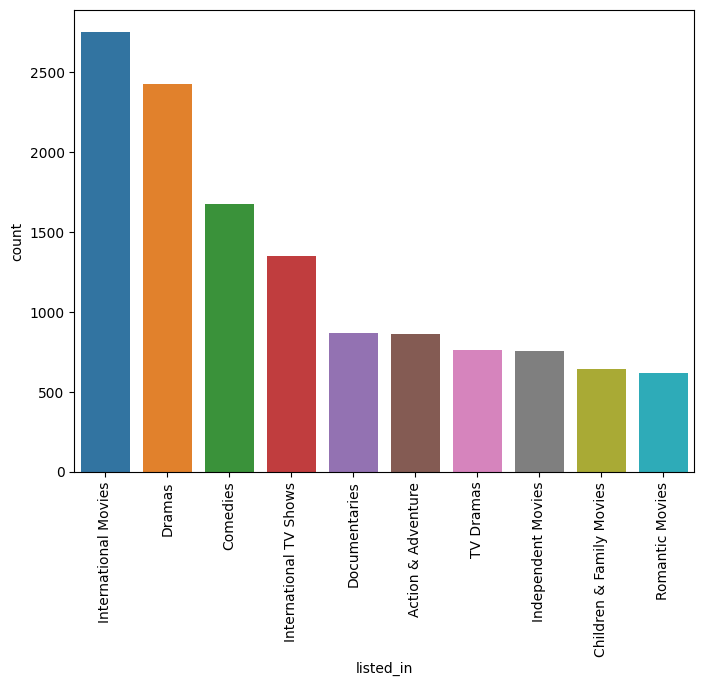

In [ ]:
plt.figure(figsize=(8,6))
top_genre=df_comb_genre['listed_in'].value_counts().head(10).index
sns.countplot(data=df_comb_genre,x='listed_in',order=top_genre)
plt.xticks(rotation=90)
plt.show()

***Observations -***
*  The Anupam kher featured highest published on netflix followed by Shah rukh khan
*  The International movies highest genre published on  netflix followed by Dramas




# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

**a. For Non-graphical Analysis:**

In [ ]:
# df.info()

In [ ]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

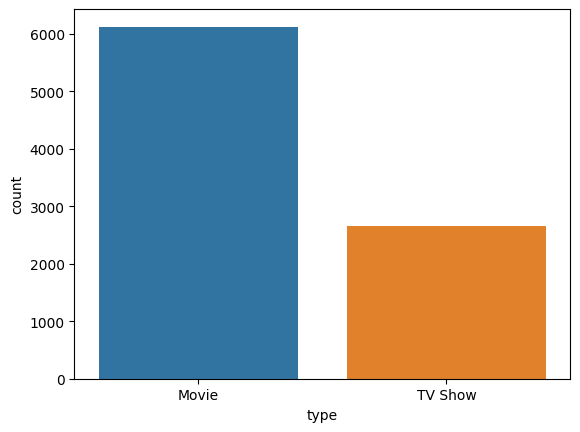

In [ ]:
sns.countplot(data=df,x='type')
plt.show()

***Observations -***

*  The high number of movies are pulished on Netflix compared to TV shows



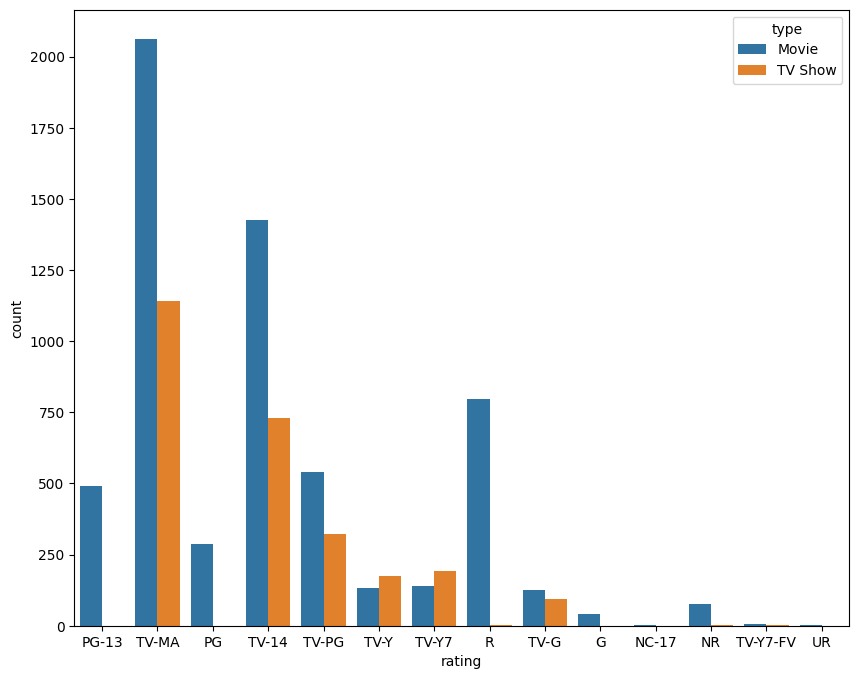

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='rating',hue='type')
plt.show()

***Observations -***
*   Netflix got highest TV-MA(Mature Audience) rating in both movies and TV Show





<function matplotlib.pyplot.show(close=None, block=None)>

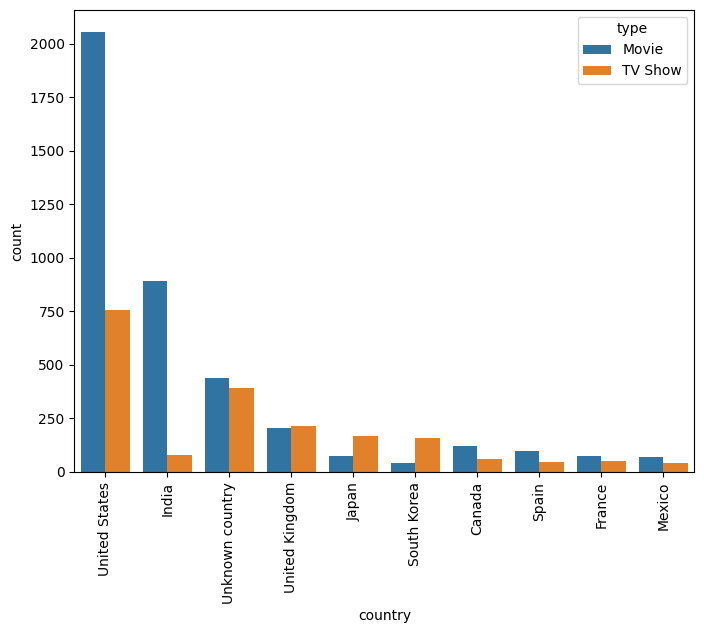

In [ ]:
plt.figure(figsize=(8,6))
top_country=df['country'].value_counts().head(10).index
sns.countplot(data=df,x='country',order=top_country,hue='type')
plt.xticks(rotation=90)
plt.show



***Observations -***
*   United states country is highest where movies and Tv Show was produced followed by India
*   Netflix should collect some unknown country names to understand the where to which country focus



<function matplotlib.pyplot.show(close=None, block=None)>

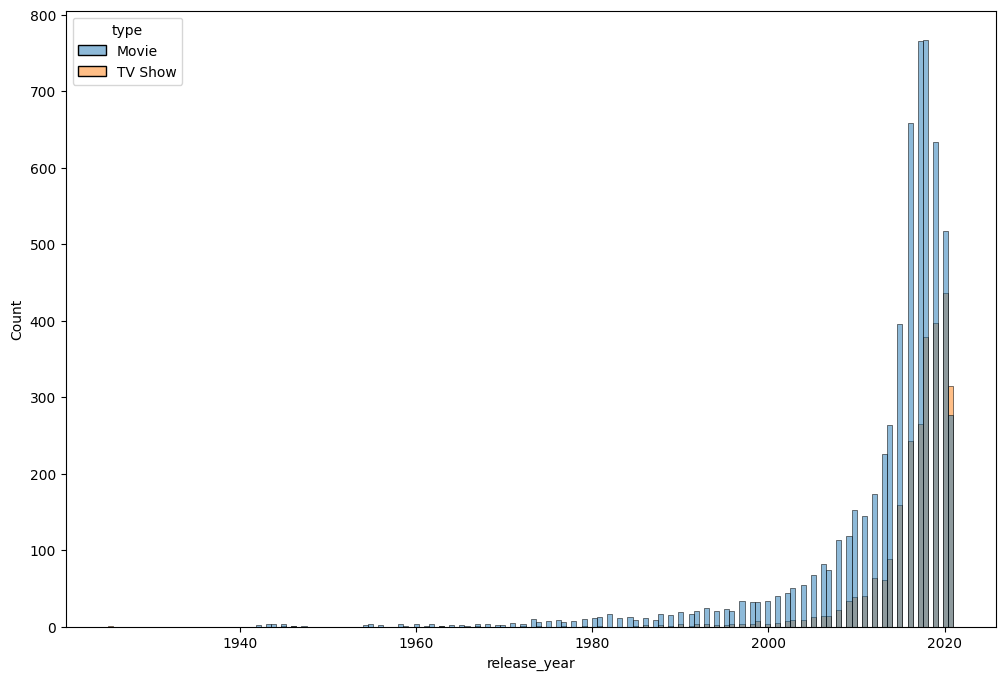

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='release_year',hue='type')
plt.show

***Observations -***
*   Released of the movies are highest in recent years and releasing of movies and Tv show increased gradually




<function matplotlib.pyplot.show(close=None, block=None)>

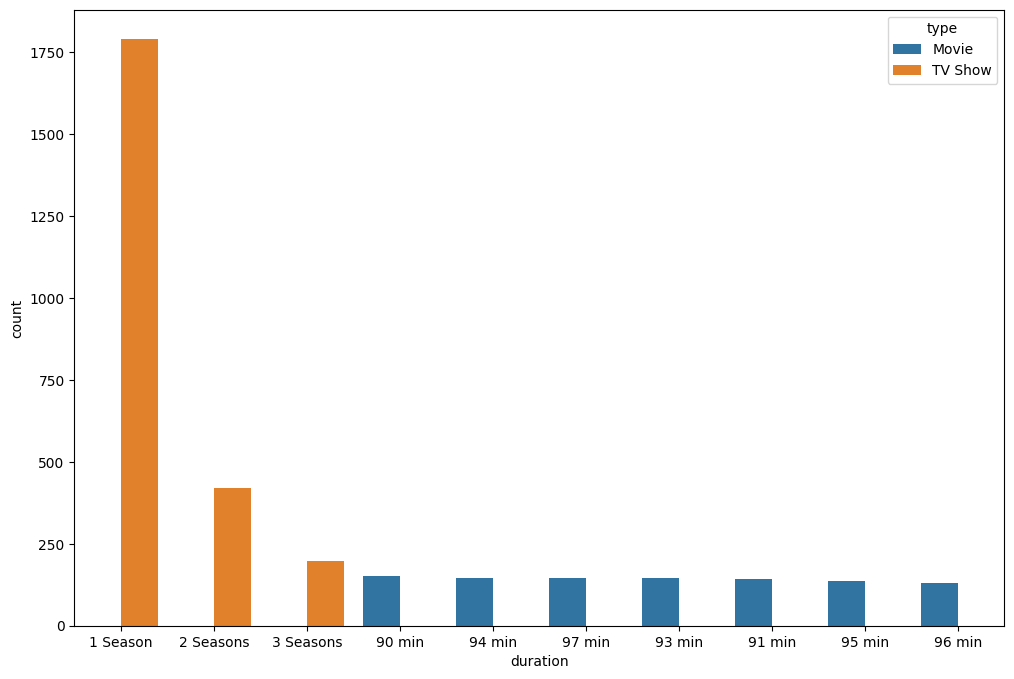

In [ ]:
plt.figure(figsize=(12,8))
top_10_duration=df['duration'].value_counts().head(10).index
sns.countplot(data=df,x='duration',hue='type',order=top_10_duration)
plt.show


***Observations -***
*   Count of TV Show Season 1 is higher among all Tv shows
*   Count of Movies Duration 90 min highest




# **2. Comparison of tv shows vs. movies.**



a. Find the number of movies produced in each country and pick the top 10
countries.

In [ ]:
df_cast=df.merge(df_comb_country, on='title', how='inner')
df_cast

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Unknown country
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actors,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown country
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
10824,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actors,Unknown country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Unknown country
10825,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
10826,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


In [ ]:
df_m=df_cast[df_cast['type']=='Movie']
top_country_m=df_m['country_y'].value_counts().head(10).index
top_country_m

Index(['United States', 'India', 'United Kingdom', 'Unknown country', 'Canada',
       'France', 'Germany', 'Spain', 'Japan', 'China'],
      dtype='object')

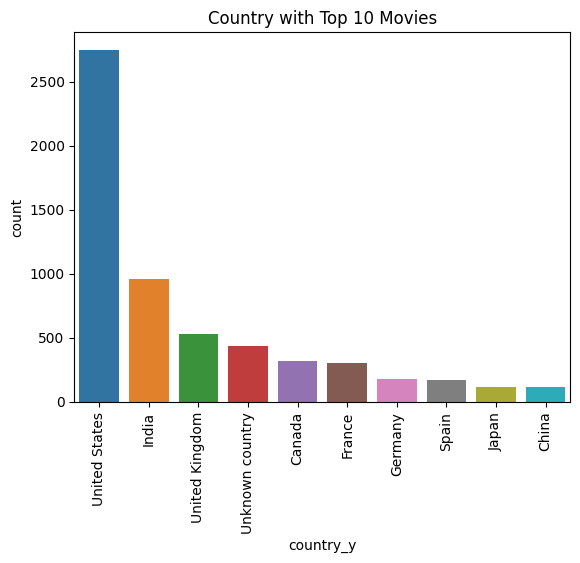

In [ ]:
sns.countplot(data=df_m,x='country_y',order=top_country_m)
plt.xticks(rotation=90)
plt.title('Country with Top 10 Movies')
plt.show()


***Observations -***
*   Movie Produced by country United stated in Highest among all followed by India





b. Find the number of Tv-Shows produced in each country and pick the top 10
countries


In [ ]:
df_tv=df_cast[df_cast['type']=='TV Show']
# df_tv['country_y'].value_counts().head(10)
top_country_tv=df_tv['country_y'].value_counts().head(10).index
top_country_tv

Index(['United States', 'Unknown country', 'United Kingdom', 'Japan',
       'South Korea', 'Canada', 'France', 'India', 'Taiwan', 'Australia'],
      dtype='object')

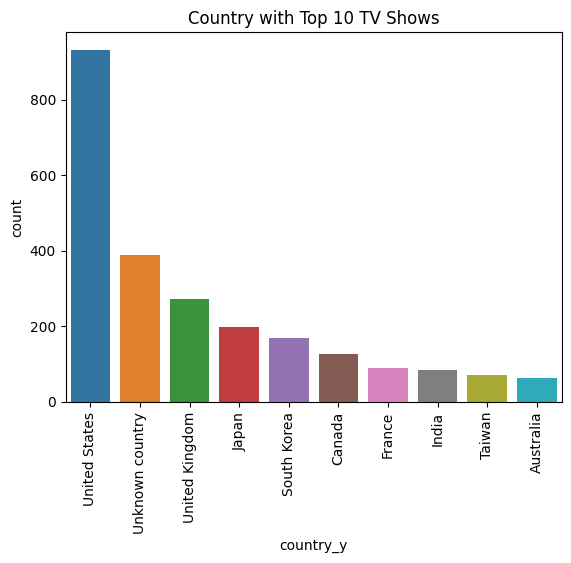

In [ ]:
sns.countplot(data=df_tv,x='country_y',order=top_country_tv)
plt.xticks(rotation=90)
plt.title('Country with Top 10 TV Shows')
plt.show()

***Observations -***
*  TV Show Produced by country United stated in Highest among all followed by Uniket Kingdom
*  Netflix should focus to collect the country produced data to get more insights from each country

# 3. What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
#Converting value of date column to datetime
df['day']= df['date_added'].dt.day
df['week'] = df['date_added'].dt.isocalendar().week
df['month']= df['date_added'].dt.month
df['year']= df['date_added'].dt.year
# df


In [ ]:
df_tv=df[df['type']=='TV Show']
# df_tv['week'].value_counts()
df_week_tv=df_tv.groupby('week')['type'].count().sort_values(ascending=False)
df_week_tv.head(10).reset_index().rename(columns={'type':'No of Tv Shows'})

,week,No of Tv Shows
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,26,73
7,5,72
8,40,72
9,50,70


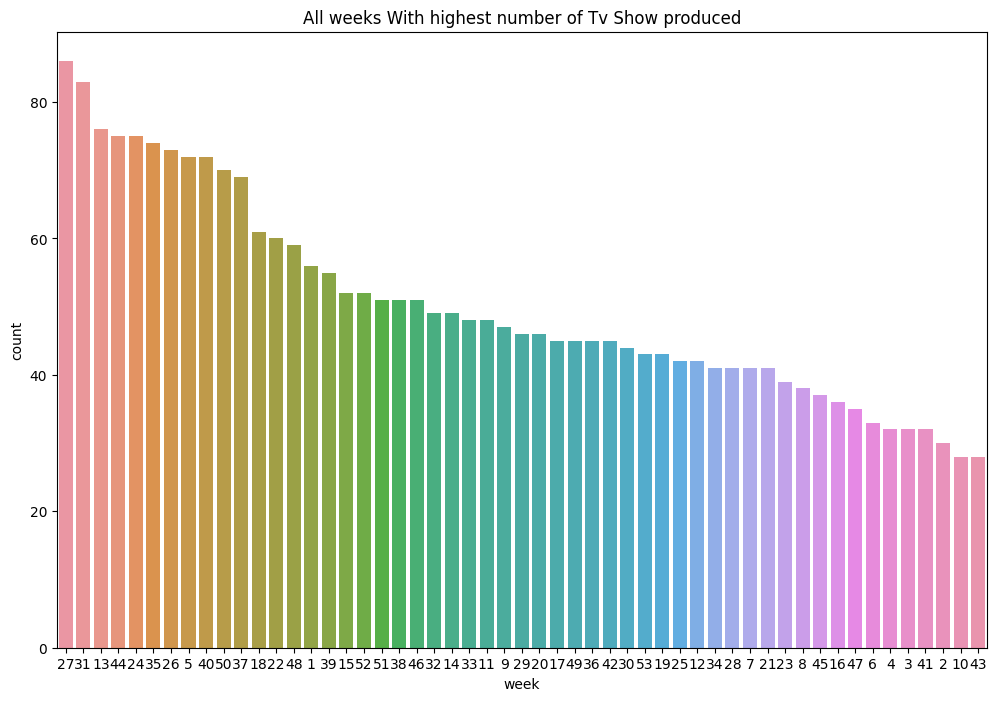

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_tv,x='week',order=df_week_tv.index)
plt.title('All weeks With highest number of Tv Show produced')
plt.show()

In [ ]:
df_m=df[df['type']=='Movie']
df_week_m=df_m.groupby('week')['type'].count().sort_values(ascending=False)
df_week_m.head(10).reset_index().rename(columns={'type':'No of Movies'})

,week,No of Movies
0,1,316
1,44,243
2,40,215
3,9,206
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


Text(0.5, 1.0, 'All weeks With highest number of Movies produced')

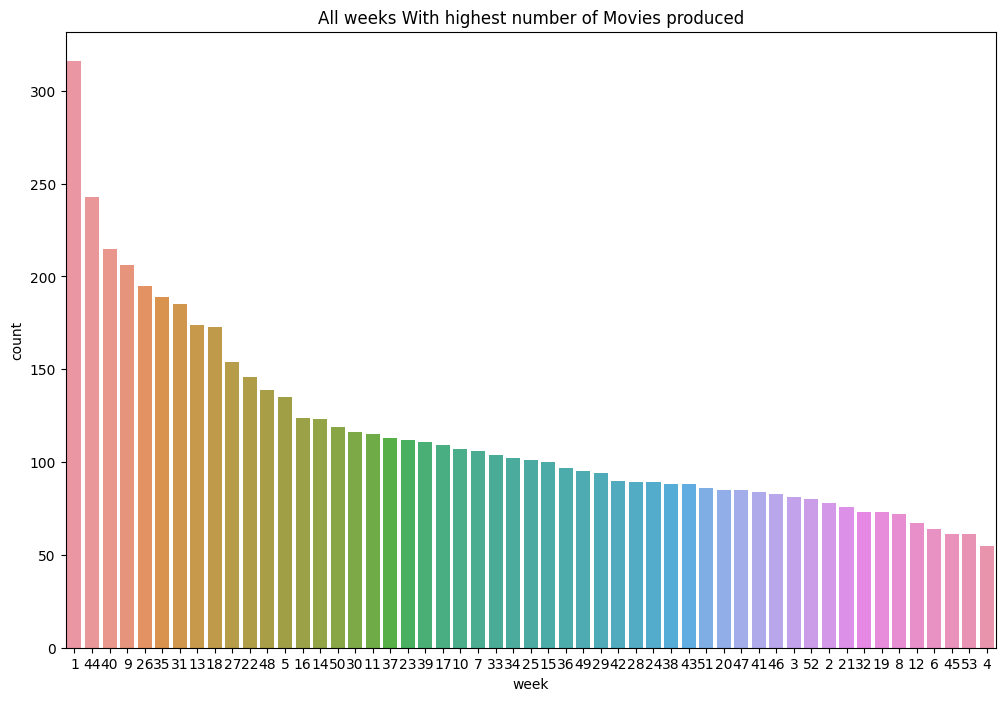

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_m,x='week',order=df_week_m.index)
plt.title('All weeks With highest number of Movies produced')

***Observations -***

*   For Tv show the week 27 is best among all week followed by week 31 to be Add on Netflix
*   For Movies the week 1 is best and most of the movies are added on netlfix that week as this week having Christmas and new year celebartion
*  The lowest prefered movies to be added week in week 4 and for Tv Shows is week 43 **bold text**  


b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:
df_month_tv=df_tv.groupby('month')['type'].count().sort_values(ascending=False)
df_month_tv.head(10).reset_index().rename(columns={'type':'No of Tv Sho'})

,month,No of Tv Sho
0,12,265
1,7,262
2,9,251
3,6,236
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,5,193


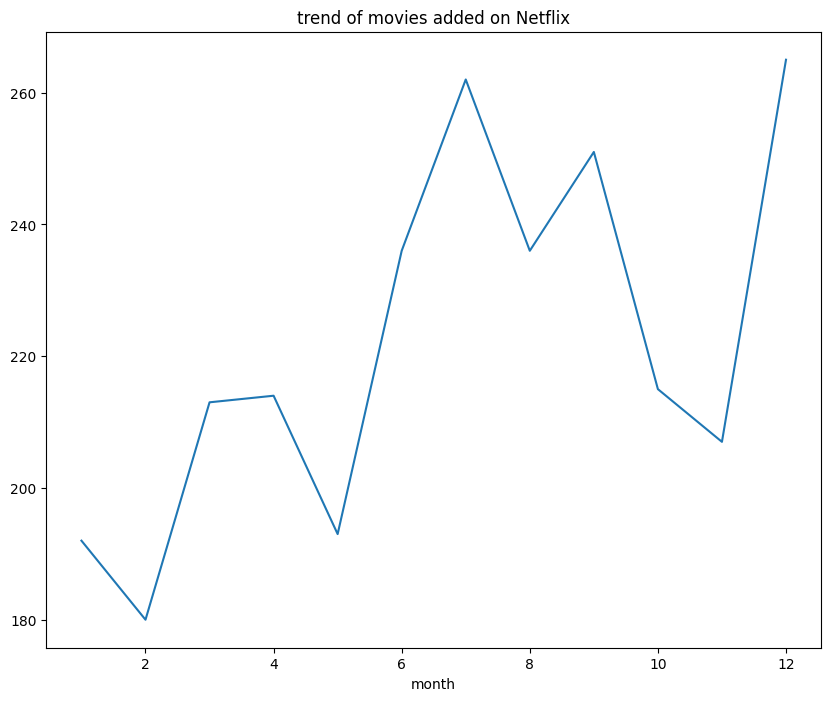

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_month_tv,x=df_month_tv.index,y=df_month_tv.values)
plt.title('trend of movies added on Netflix')
plt.show()

In [ ]:
df_month_m=df_m.groupby('month')['type'].count().sort_values(ascending=False)
df_month_m.head(10).reset_index().rename(columns={'type':'No of Movies'})

,month,No of Movies
0,7,565
1,4,549
2,12,547
3,1,545
4,10,545
5,3,528
6,8,518
7,9,518
8,11,498
9,6,492


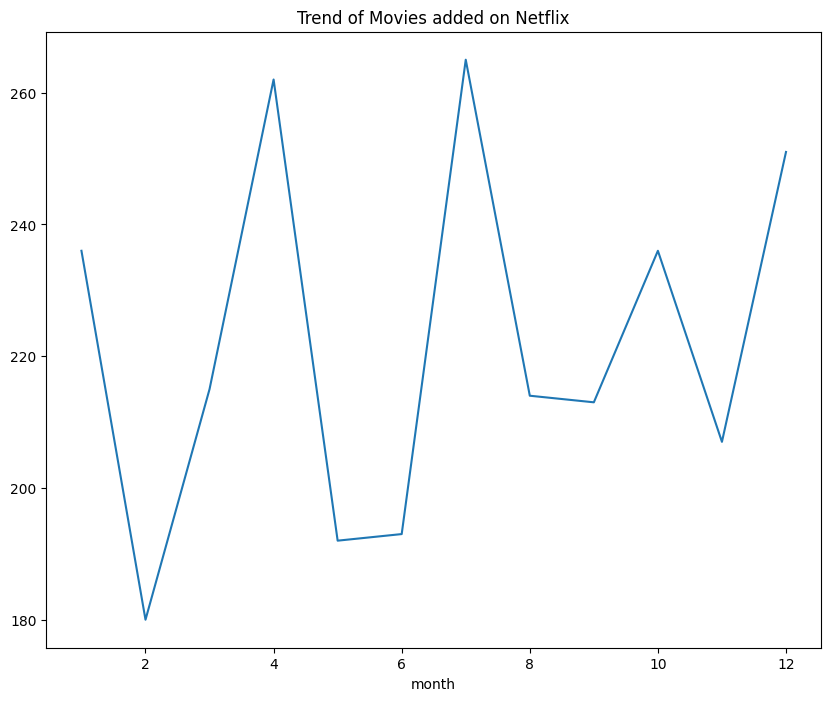

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_month_m,x=df_month_m.index,y=df_month_tv.values)
plt.title('Trend of Movies added on Netflix')
plt.show()


***Observations -***
*   For Tv show the month 12 is best among all month followed by month 7
*   For Movies the month 7 is best and most of the movies are added to netlfix on this month



## **4. Analysis of actors/directors of different types of shows/movies.**

**a. Identify the top 10 directors who have appeared in most movies or TV shows.**

In [ ]:
df_director=df.merge(df_comb_director, on='title', how='inner')
df_director

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,day,week,month,year,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,38,9,2021,Kirsten Johnson
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,Unknown Director
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,38,9,2021,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actors,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,38,9,2021,Unknown Director
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,38,9,2021,Unknown Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9590,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,47,11,2019,David Fincher
9591,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actors,Unknown country,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1,27,7,2019,Unknown Director
9592,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,44,11,2019,Ruben Fleischer
9593,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2,1,2020,Peter Hewitt


In [ ]:
df_director_tv=df_director[df_director['type']=='TV Show']
df_dierct=df_director_tv[df_director_tv['director_y']!='Unknown Director']
df_d_val=df_dierct['director_y'].value_counts().reset_index().rename(columns={'index':'Directors','director_y':'No of Tv Shows'})
df_d_val.head(10)

,Directors,No of Tv Shows
0,Alastair Fothergill,3
1,Ken Burns,3
2,Jung-ah Im,2
3,Gautham Vasudev Menon,2
4,Iginio Straffi,2
5,Hsu Fu-chun,2
6,Stan Lathan,2
7,Joe Berlinger,2
8,Shin Won-ho,2
9,Lynn Novick,2



***Observations -***
*   Alastair Fothergill	and Ken Burns	are the top director with each 3 TV Shows


In [ ]:
df_director_m=df_director[df_director['type']=='Movie']
df_dierct=df_director_m[df_director_m['director_y']!='Unknown Director']
df_d_val=df_dierct['director_y'].value_counts().reset_index().rename(columns={'index':'Directors','director_y':'No of Movies'})
df_d_val.head(10)

,Directors,No of Movies
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Jay Karas,15
5,Marcus Raboy,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Jay Chapman,12
9,Martin Scorsese,12


***Observations -***
*   Rajiv Chilaka	and Jan Suter	are the top directors


**b. Identify the top 10 actors who have appeared in most movies or TV shows.**

In [ ]:
df_actors=df.merge(df_comb_actors, on='title', how='inner')
df_actors

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,day,week,month,year,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,38,9,2021,Unknown Actors
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,Ama Qamata
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,Khosi Ngema
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,Gail Mabalane
4,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64836,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,Manish Chaudhary
64837,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,Meghna Malik
64838,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,Malkeet Rauni
64839,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,Anita Shabdish


In [ ]:
df_actors_tv=df_actors[df_actors['type']=='TV Show']
df_actors_f=df_actors_tv[df_actors_tv['cast_y']!='Unknown Actors']
df_d_val=df_actors_f['cast_y'].value_counts().reset_index().rename(columns={'index':'actors','cast_y':'No of Tv Shows'}).head(10)
df_d_val.head(10)

,actors,No of Tv Shows
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Daisuke Ono,17
3,Junichi Suwabe,17
4,Ai Kayano,16
5,Yuichi Nakamura,16
6,Yoshimasa Hosoya,15
7,Jun Fukuyama,15
8,David Attenborough,14
9,Takehito Koyasu,13


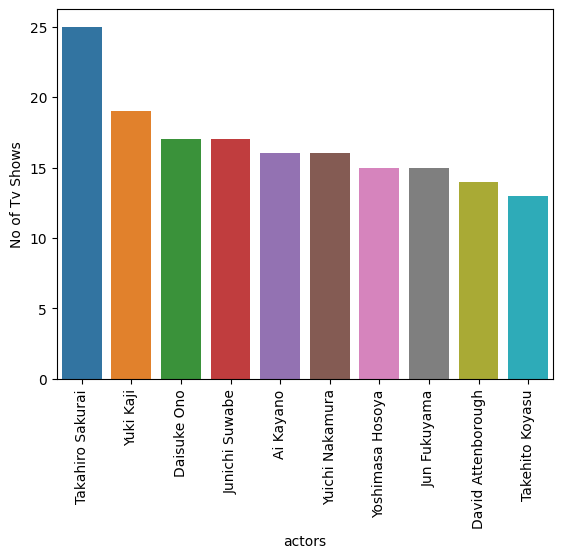

In [ ]:
sns.barplot(x=df_d_val['actors'],y=df_d_val['No of Tv Shows'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_actors_m=df_actors[df_actors['type']=='Movie']
df_actors_f=df_actors_m[df_actors_m['cast_y']!='Unknown Actors']
df_d_val=df_actors_f['cast_y'].value_counts().reset_index().rename(columns={'index':'actors','cast_y':'No of Movies'}).head(10)
df_d_val.head(10)

,actors,No of Movies
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Julie Tejwani,28
6,Paresh Rawal,28
7,Amitabh Bachchan,28
8,Rupa Bhimani,27
9,Boman Irani,27


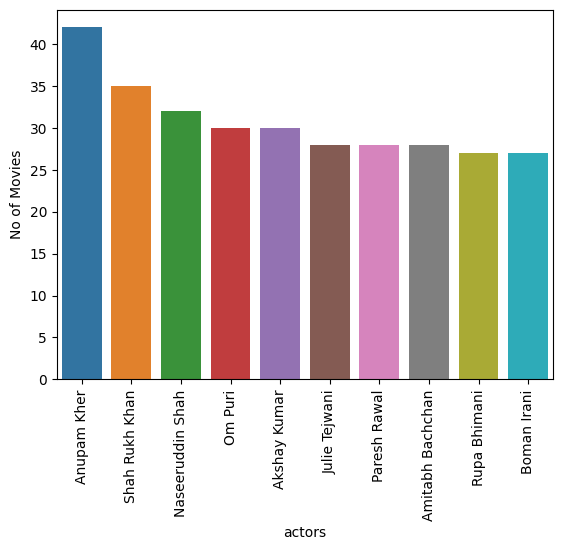

In [ ]:
sns.barplot(x=df_d_val['actors'],y=df_d_val['No of Movies'])
plt.xticks(rotation=90)
plt.show()

## 5. Which genre movies are more popular or produced more

In [ ]:
df_genre=df.merge(df_comb_genre, on='title', how='inner')
df_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in_x,description,day,week,month,year,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actors,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,38,9,2021,Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,38,9,2021,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,38,9,2021,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19289,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2,1,2020,Children & Family Movies
19290,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,2,1,2020,Comedies
19291,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,Dramas
19292,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,9,3,2019,International Movies


In [ ]:
df_genre_m=df_genre[df_genre['type']=='Movie']
df_genre_m['listed_in_y'].value_counts()

International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        53
Name: listed_in_y, dtype: int64

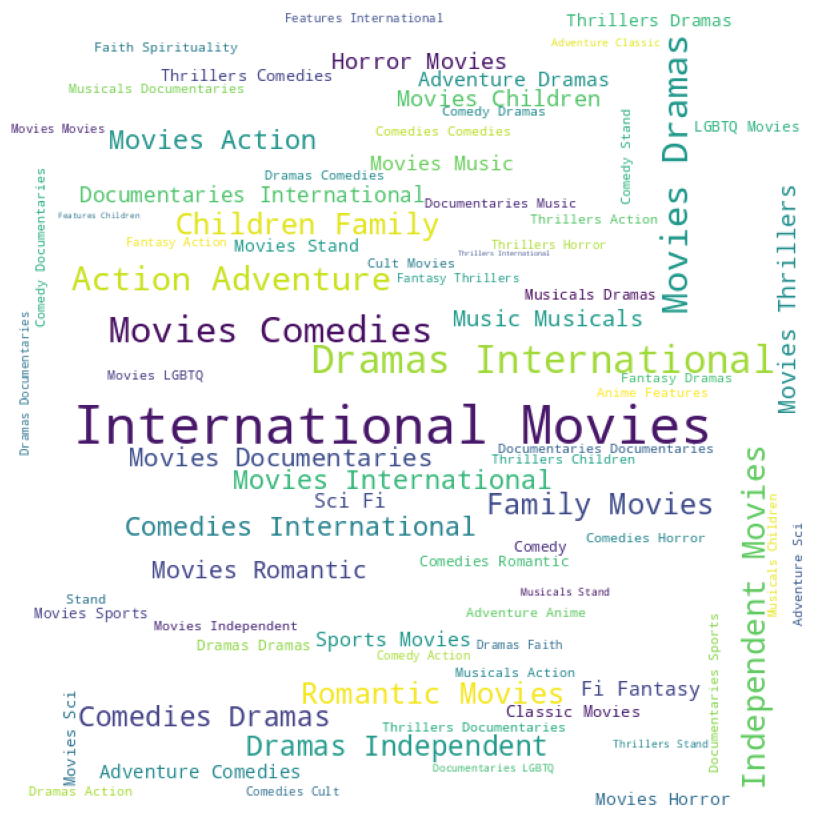

In [ ]:
from wordcloud import WordCloud
df_genre = df[df['type'] == 'Movie']
text = ' '.join(df_genre['listed_in'])
# print(text)
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 5).generate(text)

# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


***Observations -***
*   Most Popular genre is International Movies, Dramas and comedies  

## 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['release_year_n']=pd.to_datetime(df['release_year'],format='%Y')
df['added_diff_days']=(df['date_added']-df['release_year_n']).dt.days
# df['added_diff_days']

df_movie=df[(df['type']=='Movie') & (df['release_year_n'].dt.year.between(2005,2021))]
df_movie

Avg_Days_to_release=df_movie['added_diff_days'].mean()
Avg_Days_to_release


1223.4577114427861

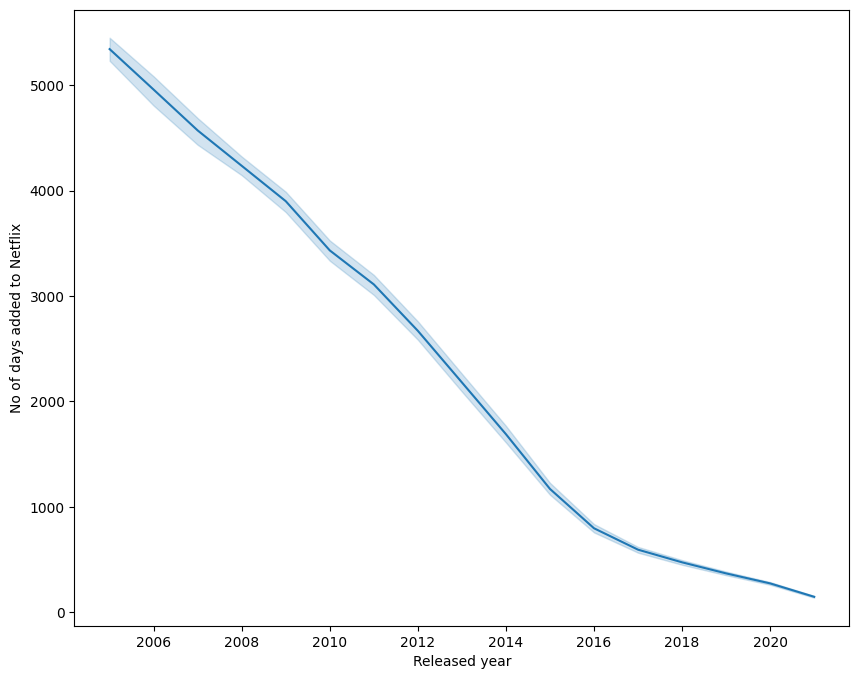

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_movie,x='release_year',y='added_diff_days')
plt.xlabel('Released year')
plt.ylabel('No of days added to Netflix')
plt.show()

***Observations -***
*   The average 1223 days the movie will be added to Netflix after the release of the movie
*   The adding movies on netflix gradually decreasing number of days by year on years and this is good sign as the netflix can be capture more audience to stream on platform




In [ ]:
# from google.colab import drive
# drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('BusinessCase:Netflix_TGajanan.ipynb')